<a href="https://colab.research.google.com/github/JoshuaChung93/Cryptocurrency-trading-bot/blob/main/BTC_time_interval_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTC historical dataset/BTCUSDT-hourly-historical-price.csv',low_memory=False)

In [ ]:
# generate dataframe wtih columns that we use only
df['datetime'] = pd.to_datetime(df['Unnamed: 0'])
df = df[['datetime','open','high','low','close','volume']]

# Grouping the data

In [ ]:
pd.options.mode.chained_assignment = None

# Extract the hour from the datetime column and create a new column with just the hour
df.loc[:,"hour"] = df["datetime"].dt.hour

# Calculate the return for each row
df.loc[:,"return"] = (df["close"] - df["open"]) / df["open"]

# Group the data by hour and calculate the mean return for each hour
mean_returns_by_hour = df.groupby("hour")["return"].mean()

# Print the mean returns by hour
print(mean_returns_by_hour)

hour
0     0.000054
1    -0.000198
2    -0.000135
3     0.000218
4     0.000192
5     0.000517
6    -0.000391
7     0.000555
8     0.000266
9    -0.000262
10   -0.000004
11    0.000269
12    0.000171
13    0.000643
14    0.000336
15    0.000017
16    0.000224
17    0.000032
18   -0.000298
19   -0.000483
20   -0.000147
21    0.000331
22    0.000290
23    0.000095
Name: return, dtype: float64


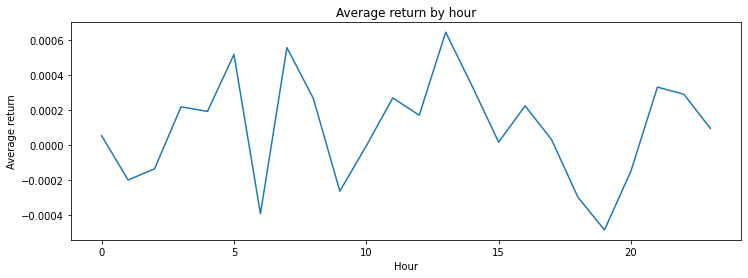

In [ ]:
mean_returns_by_hour.plot(figsize=(12,4))

# add a title and label the axes
plt.title('Average return by hour')
plt.xlabel('Hour')
plt.ylabel('Average return')

plt.show()

In [ ]:
max_return = mean_returns_by_hour.max()
max_return_hour = mean_returns_by_hour.idxmax()

print('max return:',round(max_return,5),'/ hour:',max_return_hour)

max return: 0.00064 / hour: 13


In [ ]:
top_3_hours = mean_returns_by_hour.nlargest(3)

top_3_hours

hour
13    0.000643
7     0.000555
5     0.000517
Name: return, dtype: float64

In [ ]:
# Let's group the volume column

# Create the number of bins
num_bins = 10

# Use pandas.qcut() to create the binned data
binned_data = pd.qcut(df['volume'], q=num_bins, labels=range(num_bins))

In [ ]:
binned_data

0        0
1        0
2        0
3        0
4        0
        ..
41849    0
41850    0
41851    0
41852    0
41853    0
Name: volume, Length: 41854, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [ ]:
binned_data[binned_data!=0]

2084     1
2490     1
2491     1
2497     1
2498     1
        ..
41841    8
41842    4
41843    2
41844    4
41845    3
Name: volume, Length: 37668, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]